In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_csv("data/dataset-seek.csv")
data=pd.read_csv('final_seek.csv')
#df.head()
data.head()

,Unnamed: 0,c_Consulting & Strategy,c_Education & Training,c_Government & Defence,c_Information & Communication Technology,c_Science & Technology,l_Macquarie Park,l_Minchinbury,l_North Shore & Northern Beaches,l_North Sydney,l_Parliament House,l_Sydney NSW,max_salary,min_salary,avg_salary,position_lvl,company_count,days,date,time
0,0,0,0,0,1,0,0,0,0,0,0,1,160.0,150,155.0,-1,13,5d,2022-10-21,21:36:57
1,1,0,0,0,1,0,0,0,0,0,0,1,270.0,220,245.0,-1,13,5d,2022-10-21,21:36:57
2,2,0,0,0,1,0,0,0,0,0,0,1,140.0,120,130.0,-1,15,21h,2022-10-26,00:36:57
3,3,0,0,0,1,0,0,0,0,0,0,1,140.0,120,130.0,0,13,6d,2022-10-20,21:36:57
4,4,0,1,0,0,0,0,0,0,0,0,1,140.0,120,130.0,-1,13,15h,2022-10-26,06:36:57


In [3]:
data=data.iloc[:,1:16]

In [4]:
data.shape

(520, 15)

In [5]:
df1=df.iloc[:520,1:]
df1.shape

(520, 7)

In [6]:
dummy=pd.concat([data,df1], axis="columns",join="inner")
dummy.shape

(520, 22)

In [7]:
dummy.head()
df1=dummy.drop(['company','location','salary','class','days_before'],axis=1)

In [8]:
df1.head()

,c_Consulting & Strategy,c_Education & Training,c_Government & Defence,c_Information & Communication Technology,c_Science & Technology,l_Macquarie Park,l_Minchinbury,l_North Shore & Northern Beaches,l_North Sydney,l_Parliament House,l_Sydney NSW,max_salary,min_salary,avg_salary,position_lvl,description,title
0,0,0,0,1,0,0,0,0,0,0,1,160.0,150,155.0,-1,Work with a leading business to continue to bu...,Machine Learning Engineer
1,0,0,0,1,0,0,0,0,0,0,1,270.0,220,245.0,-1,Looking for exceptional Machine Learning Engin...,Machine Learning Engineer
2,0,0,0,1,0,0,0,0,0,0,1,140.0,120,130.0,-1,"Picture this… you, working on software that tr...",Machine Learning Engineer
3,0,0,0,1,0,0,0,0,0,0,1,140.0,120,130.0,0,We have an opportunity for a Junior Machine Le...,Junior Machine Learning Engineer
4,0,1,0,0,0,0,0,0,0,0,1,140.0,120,130.0,-1,The UTS Data Science Institute invites applica...,PhD Studentships in Automated and Transparent ...


In [9]:
df1.title.value_counts()

Data Scientist                                                    87
Machine Learning Engineer                                         78
Data Engineer                                                     62
Senior Data Engineer                                              52
Principal Data Engineer - Data & Analytics                        15
Junior Machine Learning Engineer                                  13
Principle Data Scientist                                          13
Engineer- Big Data Technologies                                   13
Data Scientist (Knowledge Graph)                                  13
Data Engineer - Python (High Frequency Trading)                   13
Data Engineers - Big Data                                         13
Senior Data Scientist - Macquarie Park/WfH                        13
Senior AI Systems Engineer                                        13
Machine Learning Lead                                             13
Senior Data Scientist             

In [10]:
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

In [11]:
def stem_sentences(sentence):
    
    #sentence = sentence.replace("[^a-zA-Z\d\s.]", " ")    
    line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(sentence))
    tokens = line.replace(".", " ").split()
    stemmed_tokens = [stemmer.stem(token.strip()) for token in tokens]
    return ' '.join(stemmed_tokens)


In [12]:
df1['summary_stem'] = df1['description'].apply(stem_sentences)
df1['summary_stem'].head(10)

0    work with a lead busi to continu to build out ...
1    look for except machin learn engin for an e co...
2    pictur thi you work on softwar that transform ...
3    we have an opportun for a junior machin learn ...
4    the ut data scienc institut invit applic for t...
5    join our quantit trade team and build model fo...
6    senior data engin machin learn perman posit sy...
7    join a fantast team within a challeng environ ...
8    cpb contractor s is seek an enthusiast data sc...
9    develop and manag ml ai system experi on moder...
Name: summary_stem, dtype: object

In [13]:

    
df1.replace(to_replace=r".*[Dd]ata\s.[Sc]ien.*", value='Data Scientist', regex=True,inplace=True)
df1.replace(to_replace=r".*[Dd]ata\s[Ee]ngi.*", value='Data Engineer', regex=True,inplace=True)
df1.replace(to_replace=r".*[Mm]achine\s[Ll]earn.*", value='Machine Learning', regex=True,inplace=True)
df1.replace(to_replace=['AI Engineer','Senior AI Systems Engineer','Engineer- Big Data Technologies',
                       'Analytics Engineer','Principal Data Consultant'], value='AI',inplace=True)

In [14]:
df1.title.value_counts()

Data Engineer       173
Data Scientist      167
Machine Learning    117
AI                   63
Name: title, dtype: int64

In [15]:
df1.head()

,c_Consulting & Strategy,c_Education & Training,c_Government & Defence,c_Information & Communication Technology,c_Science & Technology,l_Macquarie Park,l_Minchinbury,l_North Shore & Northern Beaches,l_North Sydney,l_Parliament House,l_Sydney NSW,max_salary,min_salary,avg_salary,position_lvl,description,title,summary_stem
0,0,0,0,1,0,0,0,0,0,0,1,160.0,150,155.0,-1,Machine Learning,Machine Learning,work with a lead busi to continu to build out ...
1,0,0,0,1,0,0,0,0,0,0,1,270.0,220,245.0,-1,Machine Learning,Machine Learning,look for except machin learn engin for an e co...
2,0,0,0,1,0,0,0,0,0,0,1,140.0,120,130.0,-1,"Picture this… you, working on software that tr...",Machine Learning,pictur thi you work on softwar that transform ...
3,0,0,0,1,0,0,0,0,0,0,1,140.0,120,130.0,0,Machine Learning,Machine Learning,we have an opportun for a junior machin learn ...
4,0,1,0,0,0,0,0,0,0,0,1,140.0,120,130.0,-1,Data Scientist,Machine Learning,Data Scientist


In [16]:
df1.columns

Index(['c_Consulting & Strategy', 'c_Education & Training',
       'c_Government & Defence', 'c_Information & Communication Technology',
       'c_Science & Technology', 'l_Macquarie Park', 'l_Minchinbury',
       'l_North Shore & Northern Beaches', 'l_North Sydney',
       'l_Parliament House', 'l_Sydney NSW', 'max_salary', 'min_salary',
       'avg_salary', 'position_lvl', 'description', 'title', 'summary_stem'],
      dtype='object')

In [17]:
df1=df1.drop(['description'],axis=1)
y = df1['title']
X = df1.drop(columns=['title'])
X.head(2)

,c_Consulting & Strategy,c_Education & Training,c_Government & Defence,c_Information & Communication Technology,c_Science & Technology,l_Macquarie Park,l_Minchinbury,l_North Shore & Northern Beaches,l_North Sydney,l_Parliament House,l_Sydney NSW,max_salary,min_salary,avg_salary,position_lvl,summary_stem
0,0,0,0,1,0,0,0,0,0,0,1,160.0,150,155.0,-1,work with a lead busi to continu to build out ...
1,0,0,0,1,0,0,0,0,0,0,1,270.0,220,245.0,-1,look for except machin learn engin for an e co...


In [18]:
import seaborn as sns

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


%config InlineBackend.figure_format = 'retina'
%matplotlib inline



In [19]:
custom_stop_words = list(ENGLISH_STOP_WORDS)
# add own custom stopwords
word_list = ['thi', 'skill','click', 'job', 'role', 'cover', 'letter','resume', 'apply', 'button', 'abil'
             'quot', 'pleas', 'requir', 'phone', 'call', 'provid', 'includ', 'success', 'com', 'au', 'strong']
for w in word_list:
    custom_stop_words.append(w)

In [20]:
from wordcloud import WordCloud
def generate_word_cloud(words, freq=False):
    
    # if not frequency, the data is given as panda series
    # then need to do some data processing first
    if freq==False:

        stem_words = ' '

        for val in words:
            #val = str(val).lower()
            #line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(val))
            tokens = str(val).replace(".", " ").split()
            stemmed_tokens = [token.strip() for token in tokens] 
            stem_words = ' '.join(stemmed_tokens)

    #'--------------------------------------------------'
    # generate word could with some defined parameters
    wcloud = WordCloud(width = 480, height = 480,
                    background_color ='white', 
                    stopwords = custom_stop_words, 
                    min_font_size = 8)
    
    #'--------------------------------------------------'
    # now generate word clound based
    if freq:
        wcloud.generate_from_frequencies(words)
    else:
        wcloud.generate(stem_words) 
        
    #'--------------------------------------------------'
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

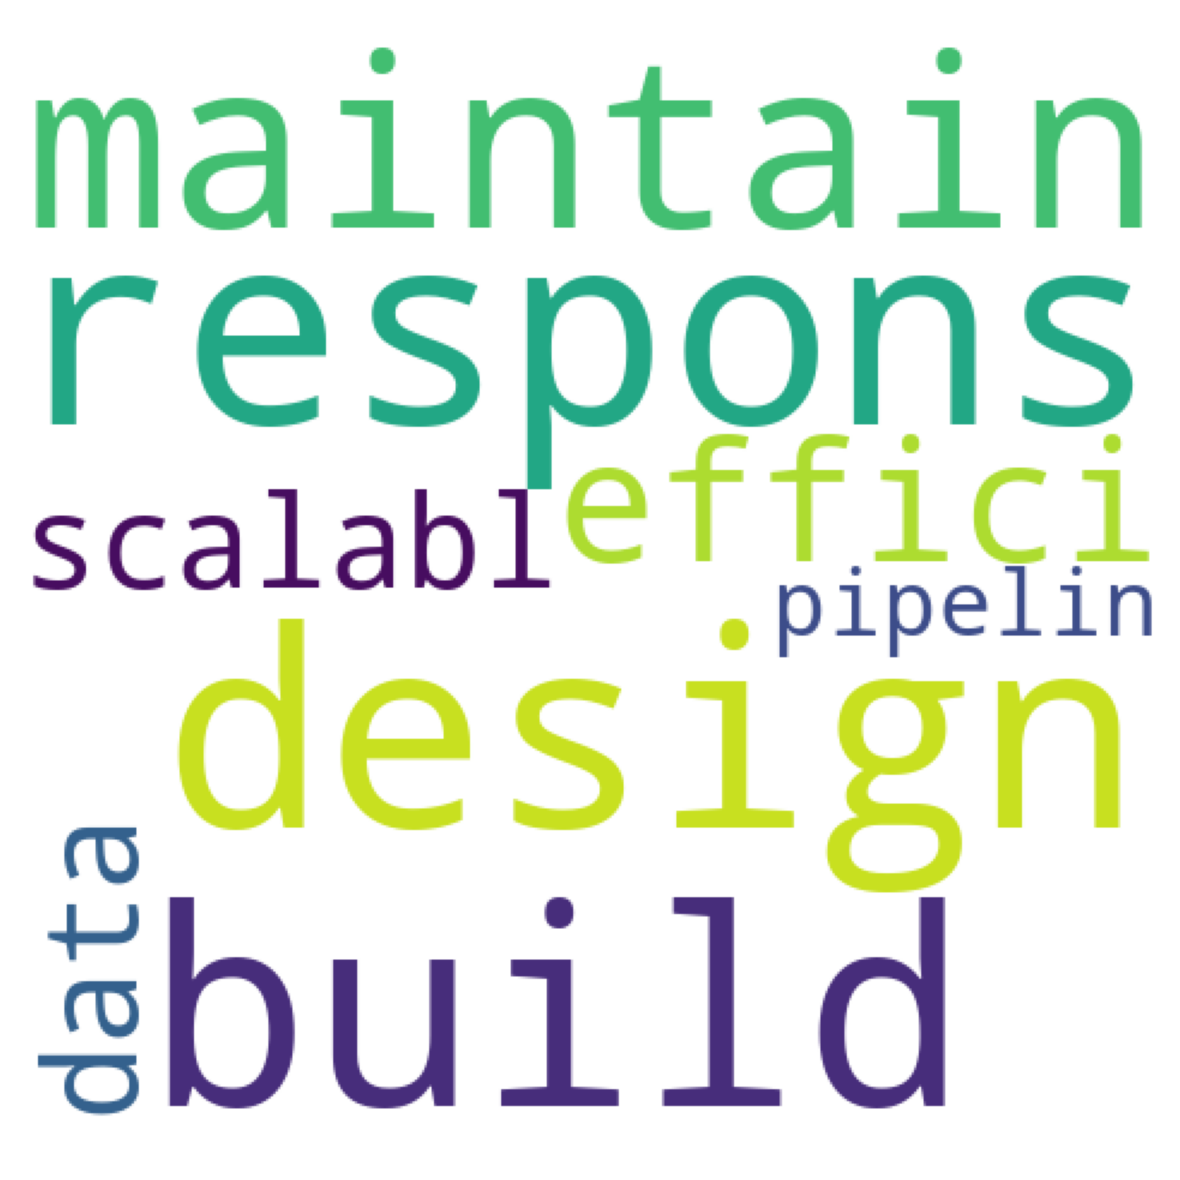

In [21]:
generate_word_cloud(X.summary_stem)

In [22]:
#generate_word_cloud(X_train.summary_stem)


In [23]:
def tokenize_test(vec):
    
    # Create document-term matrices - NLP
    #------------------------------------------------------------
    # Fitting and Transfrom the vectorizer on training data
    X_train_vec = vec.fit_transform(X_train['summary_stem'])
    print('Features: ', X_train_vec.shape[1])

    # Transform on test data
    X_test_vec = vec.transform(X_test['summary_stem'])
    #------------------------------------------------------------
    
    # Create dataframe after document-term matrices has been created
    #------------------------------------------------------------
    X_train_vec_df = pd.DataFrame(X_train_vec.todense(), columns=vec.get_feature_names())
    X_test_vec_df = pd.DataFrame(X_test_vec.todense(), columns=vec.get_feature_names())
    #------------------------------------------------------------
    
    # Extract top 10 and EDA
    #------------------------------------------------------------
    # top 10 words with highest frequency - work experience, management, data, team
    words = X_train_vec_df.sum().sort_values(ascending=False) #.head(20)
    #print(words)
    
    # plot top 10 words
    #words.plot(kind='bar', figsize=(15, 5))
    generate_word_cloud(words.to_dict(), True)
    #------------------------------------------------------------
    
    # Combine to create the full set of X
    #------------------------------------------------------------
    # remove stem columns as it now has been processed
    mask_train_df = X_train.drop('summary_stem',axis=1).reset_index(drop=True)
    mask_test_df = X_test.drop('summary_stem',axis=1).reset_index(drop=True)

    # time to put the data back to the main X_train and X_test
    X_train_dtm = pd.concat([mask_train_df, X_train_vec_df], axis=1)
    X_test_dtm = pd.concat([mask_test_df, X_test_vec_df], axis=1)
    #------------------------------------------------------------
    
    
    # Kbest Feature Selection after NLP
    #----------------------------------------------------------
    # build the selector (build one with each score type)
    skb_f = SelectKBest(f_classif) # default is k=10)

    # train the selector on data
    skb_f.fit(X_train_dtm, y_train)

    # examine results
    kbest = pd.DataFrame({'variable': X_train_dtm.columns.values.tolist(),
                         'score': list(skb_f.scores_)}).sort_values('score', ascending = False)
    
    kbest.columns = ['kBest_features', 'kBest_score']    
    kbest.reset_index(inplace=True, drop=True)

    # plot top 10 features
    kbest.head(20).plot(kind='bar', x='kBest_features', y='kBest_score', figsize=(15,5), grid=True)
    
    X_Ktrain = X_train_dtm[kbest.kBest_features]
    X_Ktest = X_test_dtm[kbest.kBest_features]

    return (X_Ktrain, X_Ktest)

Features:  444


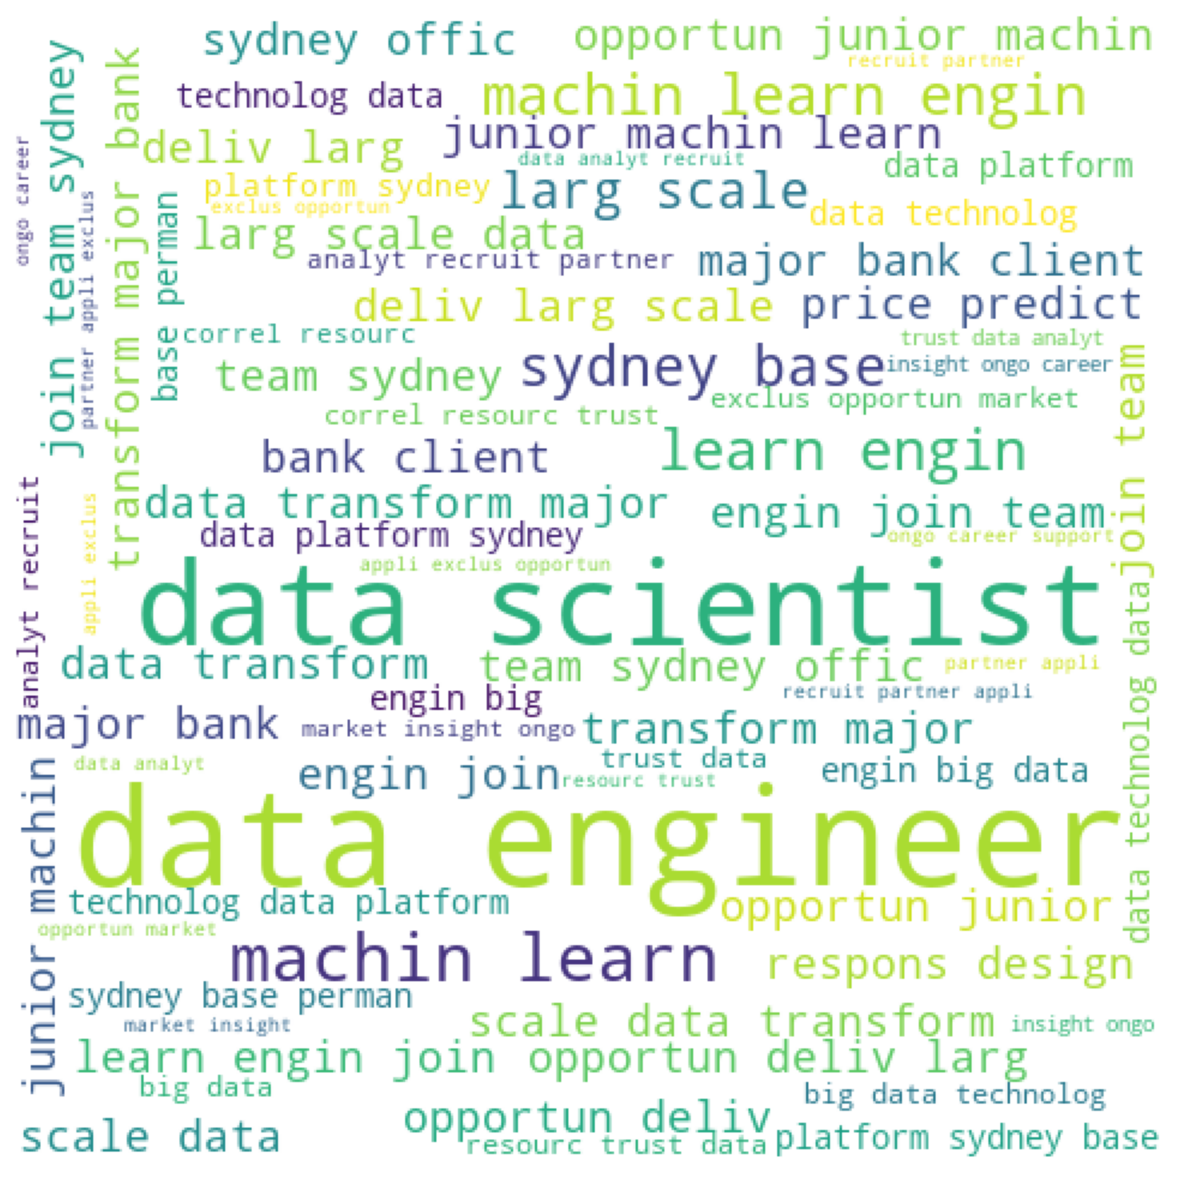

RandomForestClassifier(max_depth=50, n_jobs=-1)

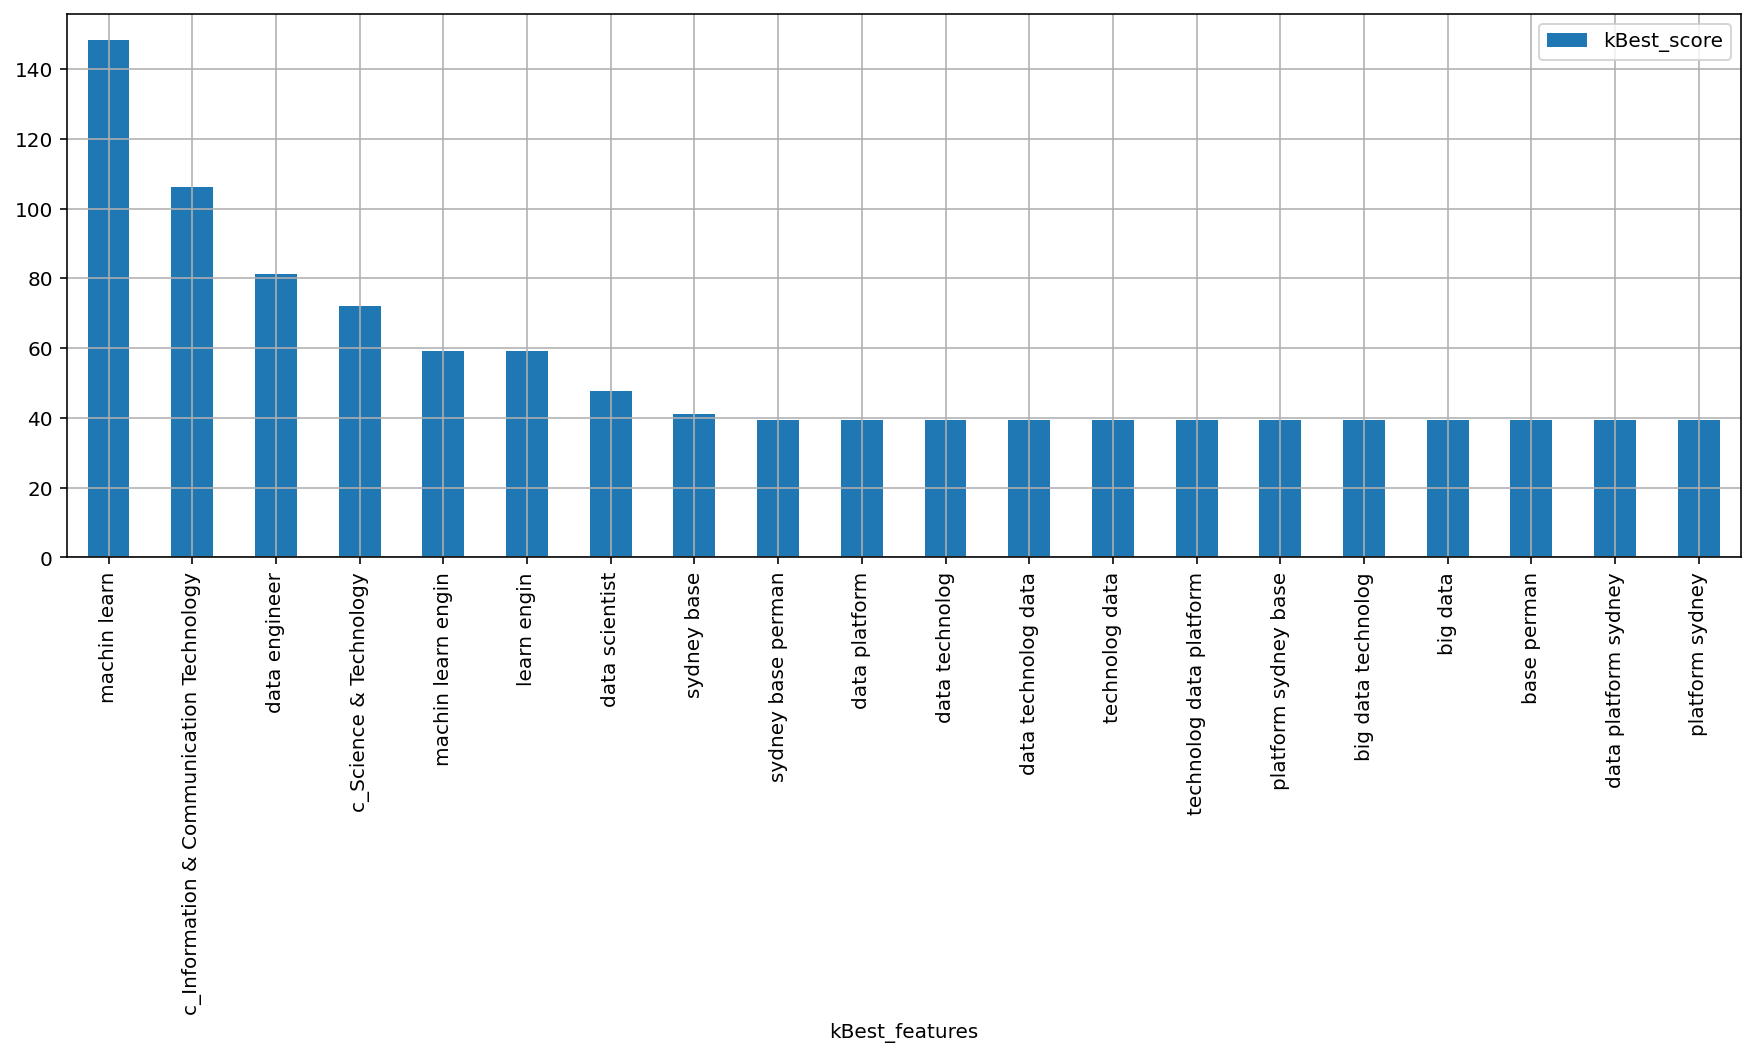

In [24]:
tvec = TfidfVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)


#X = TfidV.fit_transform(X)
#X=tvec.fit_transform(X)


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train_data, X_test_data = tokenize_test(tvec)

model=RandomForestClassifier(max_depth=50,n_estimators=100, n_jobs=-1)
model.fit(X_train_data, y_train)



In [25]:
y_pred = model.predict(X_test_data)

from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_test, y_pred)

f1_lgb = f1_score(y_test, y_pred,average='weighted')

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9294871794871795

In [ ]:
import pickle
with open('seek_predictions.pkl', 'wb') as file:
    pickle.dump(model, file)
    
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tvec, file)